# network imageXimage RDMs
representing spatial structure in common space across networks

In [ ]:
# calculate network RDMs from subsetdata

In [ ]:
dfspi_rdms = dfspi.groupby("model").corr().groupby("model").apply(set_diagonal_to_zero)

In [ ]:
# save network RDMs as hdf

In [ ]:
# load network RDMs from hdf

In [ ]:
dfspi_rdms = pd.read_hdf(
    os.path.join(
        PATH_RESULTS,
        "spatial integration",
        "single network rdms",
        "scale4 study1 allnets.h5",
    ),
    key="dfspi_rdms",
)

In [ ]:
# dfspi_rdms.to_hdf(
#     os.path.join(
#         PATH_RESULTS,
#         "spatial integration",
#         _scale,
#         "rdms " + _study + " allnets.h5",
#     ),
#     key="dfspi_rdms",
# )

# predictorRDM

In [ ]:
dl = []
for filename in os.listdir(PATH_SING_NET_RDMS):
    scale, study, _ = Path(filename).stem.split()
    study = studyname(study)
    data = (
        pd.read_hdf(os.path.join(PATH_SING_NET_RDMS, filename))
        .assign(study=study, scale=scale)
        .set_index(["study", "scale"], append=True)
        .reorder_levels(["study", "scale", "model", "img"])
    )
    dl.append(data)

dfspi_rdms = pd.concat(dl)

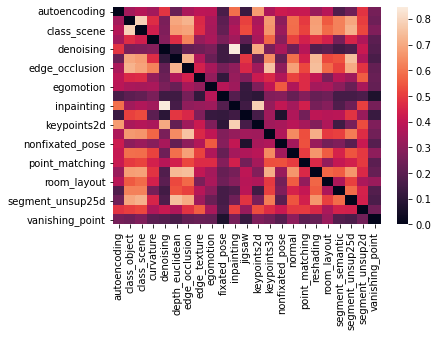

In [ ]:
g_studyscale = dfspi_rdms.groupby(["study", "scale"])
l = []
for gk in g_studyscale.groups.keys():
    gss = g_studyscale.get_group(gk).groupby("model")

    rdm = pd.DataFrame(0, index=_models, columns=_models)
    for mo1, mo2 in combinations(gss.groups.keys(), 2):
        c = correlate_rdms(gss.get_group(mo1), gss.get_group(mo2))[0]
        rdm.loc[mo1, mo2], rdm.loc[mo2, mo1] = c, c
    rdm = (
        rdm.assign(study=gk[0], scale=gk[1])
        .set_index(["study", "scale"], append=True)
        .reorder_levels(["study", "scale", None])
    )
    l.append(rdm)

predictor_rdm_3 = pd.concat(l)
sns.heatmap(predictor_rdm_3.loc[("short presentation", "scale4")])

In [ ]:
predictor_rdm_3.to_hdf(
    os.path.join(PATH_RESULTS, "spatial integration", "predictor3 bestpredlayer.hd5"),
    key="predictor_rdm_3",
)

In [ ]:
# predictor_rdm_3 = pd.DataFrame(0, index=_models, columns=_models)
# g = dfspi_rdms.groupby("model")

# for gk1, gk2 in combinations(g.groups.keys(), 2):
#     c = correlate_rdms(g.get_group(gk1), g.get_group(gk2))[0]
#     predictor_rdm_3.loc[gk1, gk2], predictor_rdm_3.loc[gk2, gk1] = c, c